# Regra de Associação
---
* As regras de associação permitem que elementos em um comjunto de dados sejam expressos como X -> Y
* Serve para descobrir elementos que ocorrem em comum dentro de um determinado conjunto de dados

In [8]:
#install.packages("arules")
#install.packages("arulesViz")

In [2]:
library(arules)
library(arulesViz)

In [3]:
trans = read.transactions("datasets/transacoes.txt", format="basket",sep=",")
trans

transactions in sparse format with
 6 transactions (rows) and
 3 items (columns)

In [13]:
inspect(trans)

    items                  
[1] {Cerveja,Pizza,Sorvete}
[2] {Pizza,Sorvete}        
[3] {Cerveja,Pizza}        
[4] {Cerveja,Pizza,Sorvete}
[5] {Cerveja,Pizza}        
[6] {Pizza}                


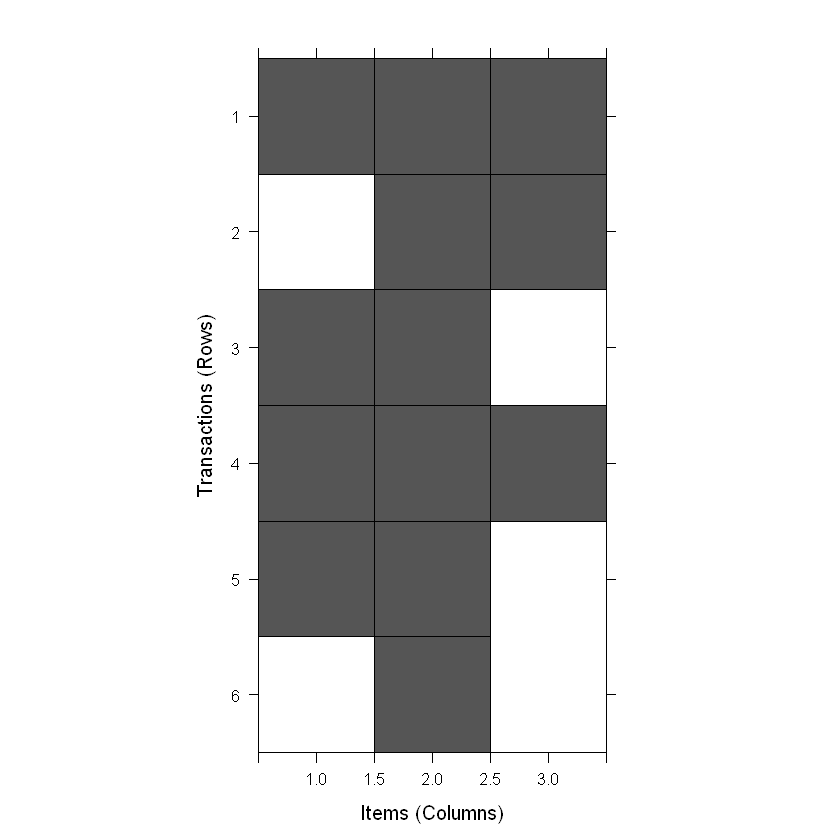

In [14]:
image(trans)

In [15]:
regras = apriori(trans, parameter=list(supp=0.5, conf=0.5, minlen=2)) # suporte e cobertura
regras

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5     0.5      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 3 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[3 item(s), 6 transaction(s)] done [0.00s].
sorting and recoding items ... [3 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [4 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 4 rules 

In [16]:
summary(regras)

set of 4 rules

rule length distribution (lhs + rhs):sizes
2 
4 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      2       2       2       2       2       2 

summary of quality measures:
    support         confidence        coverage           lift       count    
 Min.   :0.5000   Min.   :0.5000   Min.   :0.5000   Min.   :1   Min.   :3.0  
 1st Qu.:0.5000   1st Qu.:0.6250   1st Qu.:0.6250   1st Qu.:1   1st Qu.:3.0  
 Median :0.5833   Median :0.8333   Median :0.8333   Median :1   Median :3.5  
 Mean   :0.5833   Mean   :0.7917   Mean   :0.7917   Mean   :1   Mean   :3.5  
 3rd Qu.:0.6667   3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:1   3rd Qu.:4.0  
 Max.   :0.6667   Max.   :1.0000   Max.   :1.0000   Max.   :1   Max.   :4.0  

mining info:
  data ntransactions support confidence
 trans             6     0.5        0.5

In [17]:
inspect(regras)

    lhs          rhs       support   confidence coverage  lift count
[1] {Sorvete} => {Pizza}   0.5000000 1.0000000  0.5000000 1    3    
[2] {Pizza}   => {Sorvete} 0.5000000 0.5000000  1.0000000 1    3    
[3] {Cerveja} => {Pizza}   0.6666667 1.0000000  0.6666667 1    4    
[4] {Pizza}   => {Cerveja} 0.6666667 0.6666667  1.0000000 1    4    


## Visualização

Warning message:
"Unknown control parameters: type"


Available control parameters (with default values):
layout	 =  list(fun = function (graph, dim = 2, ...)  {     if ("layout" %in% graph_attr_names(graph)) {         lay <- graph_attr(graph, "layout")         if (is.function(lay)) {             lay(graph, ...)         }         else {             lay         }     }     else if (all(c("x", "y") %in% vertex_attr_names(graph))) {         if ("z" %in% vertex_attr_names(graph)) {             cbind(V(graph)$x, V(graph)$y, V(graph)$z)         }         else {             cbind(V(graph)$x, V(graph)$y)         }     }     else if (vcount(graph) < 1000) {         layout_with_fr(graph, dim = dim, ...)     }     else {         layout_with_drl(graph, dim = dim, ...)     } }, call_str = "layout_nicely(<graph>, )", args = list())
edges	 =  <environment>
nodes	 =  <environment>
nodetext	 =  <environment>
colors	 =  c("#EE0000FF", "#EEEEEEFF")
engine	 =  ggplot2
max	 =  100
verbose	 =  FALSE


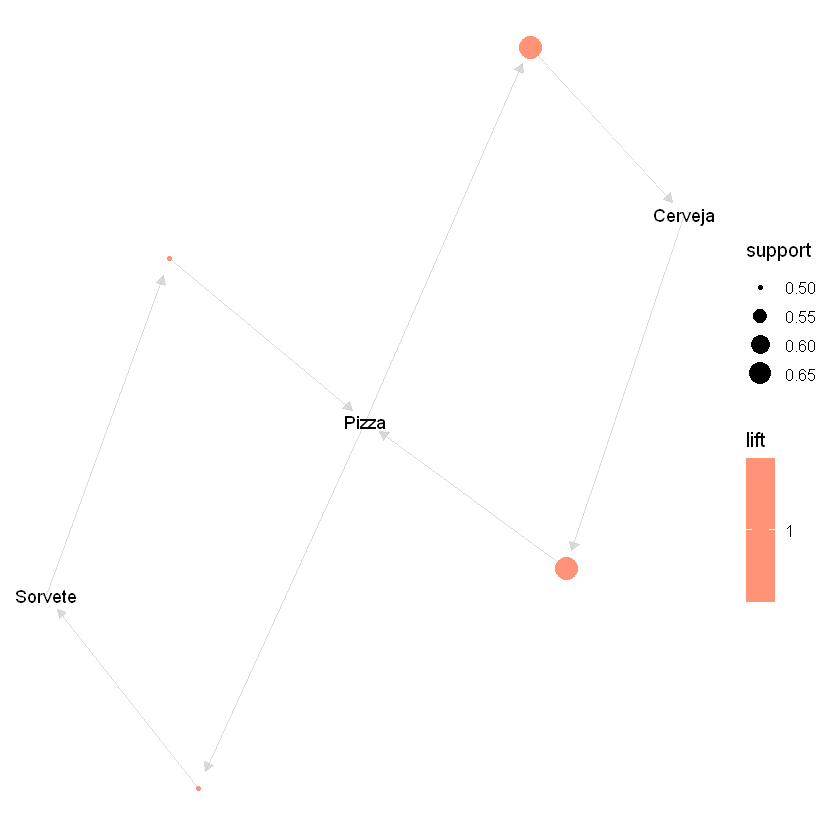

In [19]:
plot(regras, method="graph", control=list(type="items"))

Warning message:
"Unknown control parameters: type"


Available control parameters (with default values):
main	 =  Matrix for 4 rules
colors	 =  c("#EE0000FF", "#EEEEEEFF")
reorder	 =  measure
max	 =  1000
engine	 =  ggplot2
verbose	 =  FALSE
Itemsets in Antecedent (LHS)
[1] "{Sorvete}" "{Pizza}"   "{Cerveja}"
Itemsets in Consequent (RHS)
[1] "{Cerveja}" "{Sorvete}" "{Pizza}"  


ERROR while rich displaying an object: Error in grDevices::col2rgb(colour, TRUE): numerical color values must be positive

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. rep

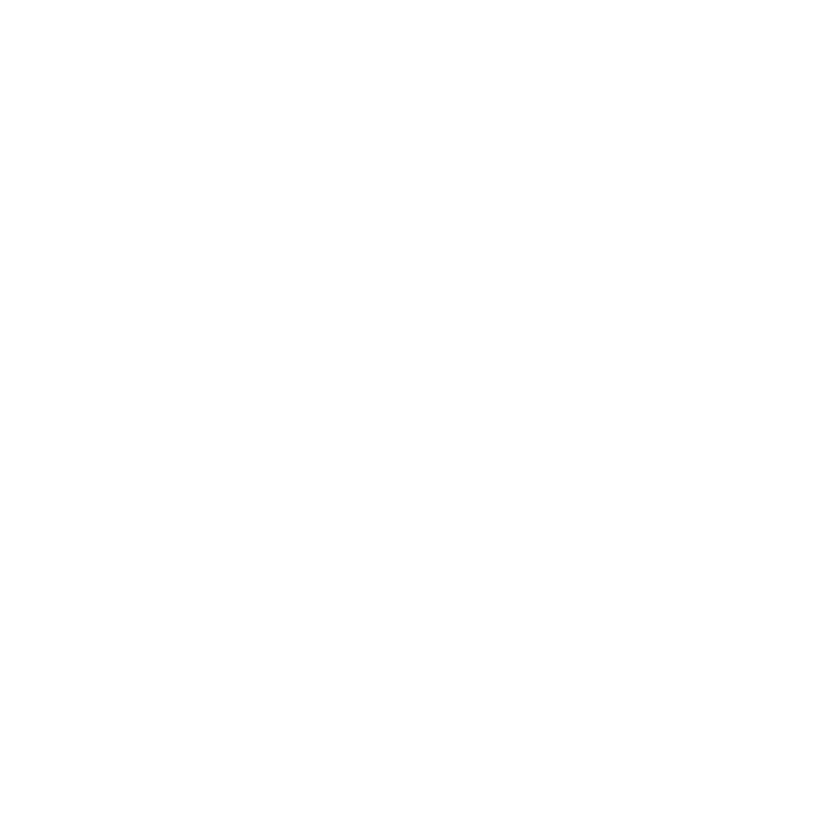

In [23]:
plot(regras, method="matrix", control=list(type="items"))

Warning message in plot.rules(regras, method = "matrix3D"):
"method 'matrix3D' is deprecated use method 'matrix' with engine '3d'"


Itemsets in Antecedent (LHS)
[1] "{Sorvete}" "{Pizza}"   "{Cerveja}"
Itemsets in Consequent (RHS)
[1] "{Cerveja}" "{Sorvete}" "{Pizza}"  


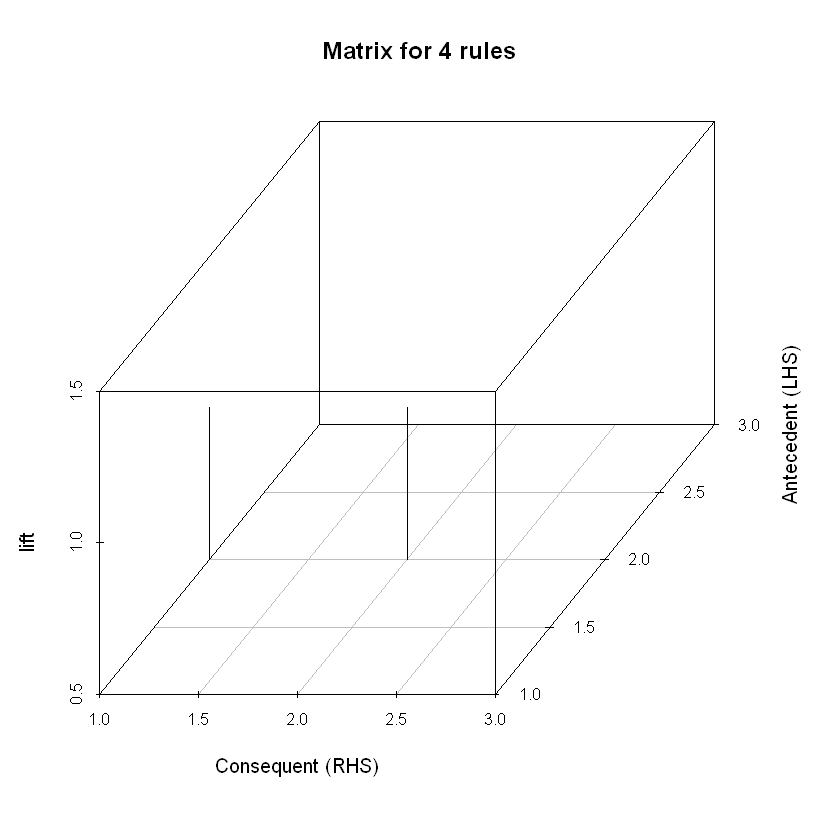

In [21]:
plot(regras, method="matrix3D")

# Eclat
---

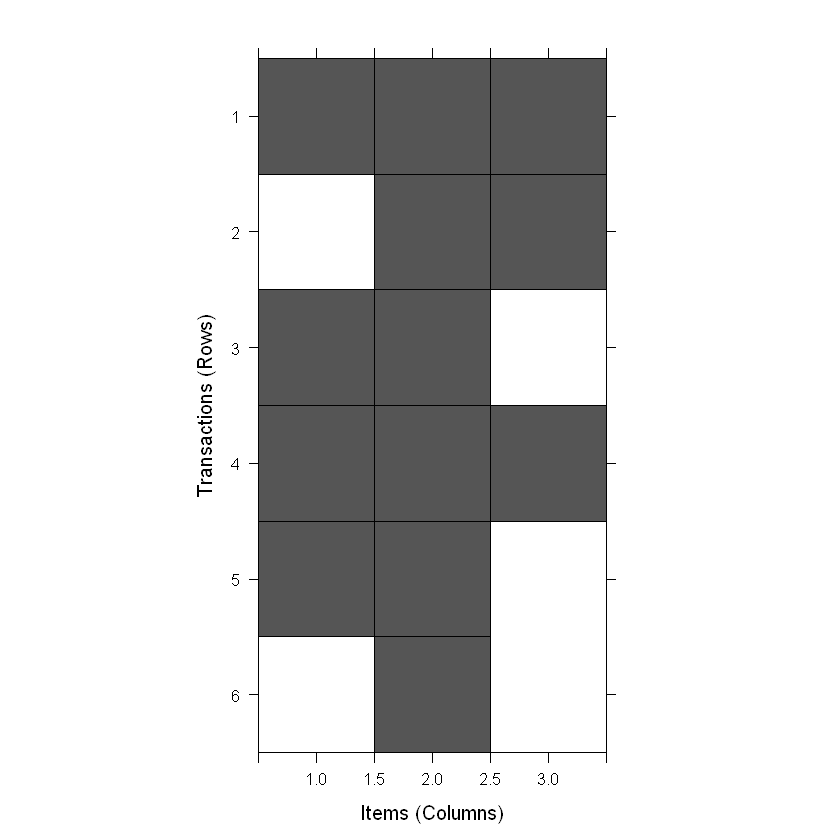

In [4]:
image(trans)

In [5]:
regras = eclat(trans, parameter=list(minlen=2))
inspect(regras)

Eclat

parameter specification:
 tidLists support minlen maxlen            target  ext
    FALSE     0.1      2     10 frequent itemsets TRUE

algorithmic control:
 sparse sort verbose
      7   -2    TRUE

Absolute minimum support count: 0 



Warning message in eclat(trans, parameter = list(minlen = 2)):
"You chose a very low absolute support count of 0. You might run out of memory! Increase minimum support.
"


create itemset ... 
set transactions ...[3 item(s), 6 transaction(s)] done [0.00s].
sorting and recoding items ... [3 item(s)] done [0.00s].
creating bit matrix ... [3 row(s), 6 column(s)] done [0.00s].
writing  ... [4 set(s)] done [0.00s].
Creating S4 object  ... done [0.00s].
    items                   support   transIdenticalToItemsets count
[1] {Cerveja,Pizza,Sorvete} 0.3333333 2                        2    
[2] {Pizza,Sorvete}         0.5000000 3                        3    
[3] {Cerveja,Sorvete}       0.3333333 2                        2    
[4] {Cerveja,Pizza}         0.6666667 4                        4    


Warning message:
"Unknown control parameters: type"


Available control parameters (with default values):
layout	 =  list(fun = function (graph, dim = 2, ...)  {     if ("layout" %in% graph_attr_names(graph)) {         lay <- graph_attr(graph, "layout")         if (is.function(lay)) {             lay(graph, ...)         }         else {             lay         }     }     else if (all(c("x", "y") %in% vertex_attr_names(graph))) {         if ("z" %in% vertex_attr_names(graph)) {             cbind(V(graph)$x, V(graph)$y, V(graph)$z)         }         else {             cbind(V(graph)$x, V(graph)$y)         }     }     else if (vcount(graph) < 1000) {         layout_with_fr(graph, dim = dim, ...)     }     else {         layout_with_drl(graph, dim = dim, ...)     } }, call_str = "layout_nicely(<graph>, )", args = list())
edges	 =  <environment>
nodes	 =  <environment>
nodetext	 =  <environment>
colors	 =  c("#EE0000FF", "#EEEEEEFF")
engine	 =  ggplot2
max	 =  100
verbose	 =  FALSE


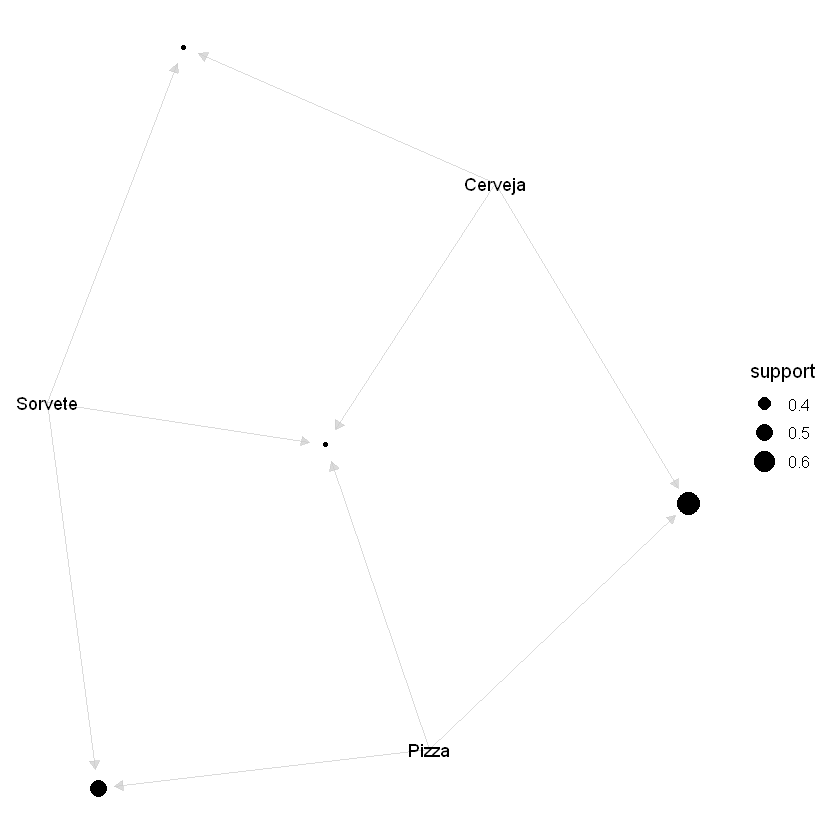

In [6]:
# Visualização
plot(regras, method="graph", control=list(type="items"))